In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

from time import perf_counter
from collections import deque

In [3]:
from environments.easy21 import (
    EasyAction, 
    EasyState, 
    EasyEnvironment,
    DealerAgent, 
    MCAgent, 
    EpsilonGreedyPolicy
)

In [4]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# visualize plots in the jupyter notebook
# check more https://goo.gl/U3Ai8R
%matplotlib inline

In [5]:
def plot_value_function(df_V, title="Value function"):

    fig = plt.figure(title, figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    
    # Prepare X and Y dimensions
    x_linspace = df_V["Dealer showing"]
    y_linspace = np.array(df_V.columns[1:], dtype=int)
    x, y = np.meshgrid(x_linspace, y_linspace)
    
    # Plot the surface.
    surf = ax.plot_surface(x, y, df_V[:, 1:].to_numpy().transpose(), 
                           cmap=cm.coolwarm,
                           rstride=1, cstride=1,
                           linewidth=0, antialiased=False)

    ax.set_xlabel("Dealer showing")
    ax.set_ylabel("Player sum")

    plt.show()

## Monte-carlo control

In [6]:
episodes = 1000000
n_checkpoints = 100

episodes_per_checkpoint = round(episodes / 100)
rewards = deque(maxlen=episodes_per_checkpoint)

Vs = []

env = EasyEnvironment()

agent = MCAgent(
    policy=EpsilonGreedyPolicy(N_zero=100)
)

In [7]:
t_start = perf_counter()
for i in range(episodes):
    
    if i % episodes_per_checkpoint == 0:
        mean_reward = np.array(rewards).mean() if len(rewards) > 1 else 0
        
        time_spent =  perf_counter() - t_start
        print(f"Episode: {i:>10}/{episodes} --- {i/episodes*100:>5.1f}% --- mean reward: {mean_reward:>5.2f} --- elapsed: {time_spent:>4.1f}")
        t_start = perf_counter()
        
        if i > 1:
            Vs.append(agent.get_V())
    
    env.reset()
    s = env.get_state()
    agent.reset_episode()
    
    while not s.terminal:

        # Take step, first agent using current state, then environment using action
        a = agent.step(s)
        s, G = env.step(a)
        
        rewards.append(G)
    
    agent.optimize(G)

Episode:          0/1000000 ---   0.0% --- mean reward:  0.00 --- elapsed:  0.0
Episode:      10000/1000000 ---   1.0% --- mean reward: -0.04 --- elapsed:  2.5
Episode:      20000/1000000 ---   2.0% --- mean reward: -0.02 --- elapsed:  2.7
Episode:      30000/1000000 ---   3.0% --- mean reward:  0.00 --- elapsed:  2.8
Episode:      40000/1000000 ---   4.0% --- mean reward:  0.02 --- elapsed:  2.8
Episode:      50000/1000000 ---   5.0% --- mean reward:  0.03 --- elapsed:  2.4
Episode:      60000/1000000 ---   6.0% --- mean reward:  0.02 --- elapsed:  2.2
Episode:      70000/1000000 ---   7.0% --- mean reward:  0.03 --- elapsed:  2.2
Episode:      80000/1000000 ---   8.0% --- mean reward:  0.04 --- elapsed:  2.4
Episode:      90000/1000000 ---   9.0% --- mean reward:  0.05 --- elapsed:  2.3
Episode:     100000/1000000 ---  10.0% --- mean reward:  0.04 --- elapsed:  2.5
Episode:     110000/1000000 ---  11.0% --- mean reward:  0.04 --- elapsed:  2.3
Episode:     120000/1000000 ---  12.0% -

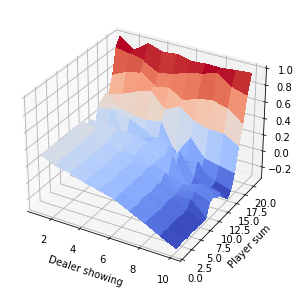

In [8]:
df_V = agent.get_V()

plot_value_function(df_V)